# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#считываем файл с данными и выведем первые 5 строк 
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# вывод информации о датафрейме методами info и describe (с транспонированием)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

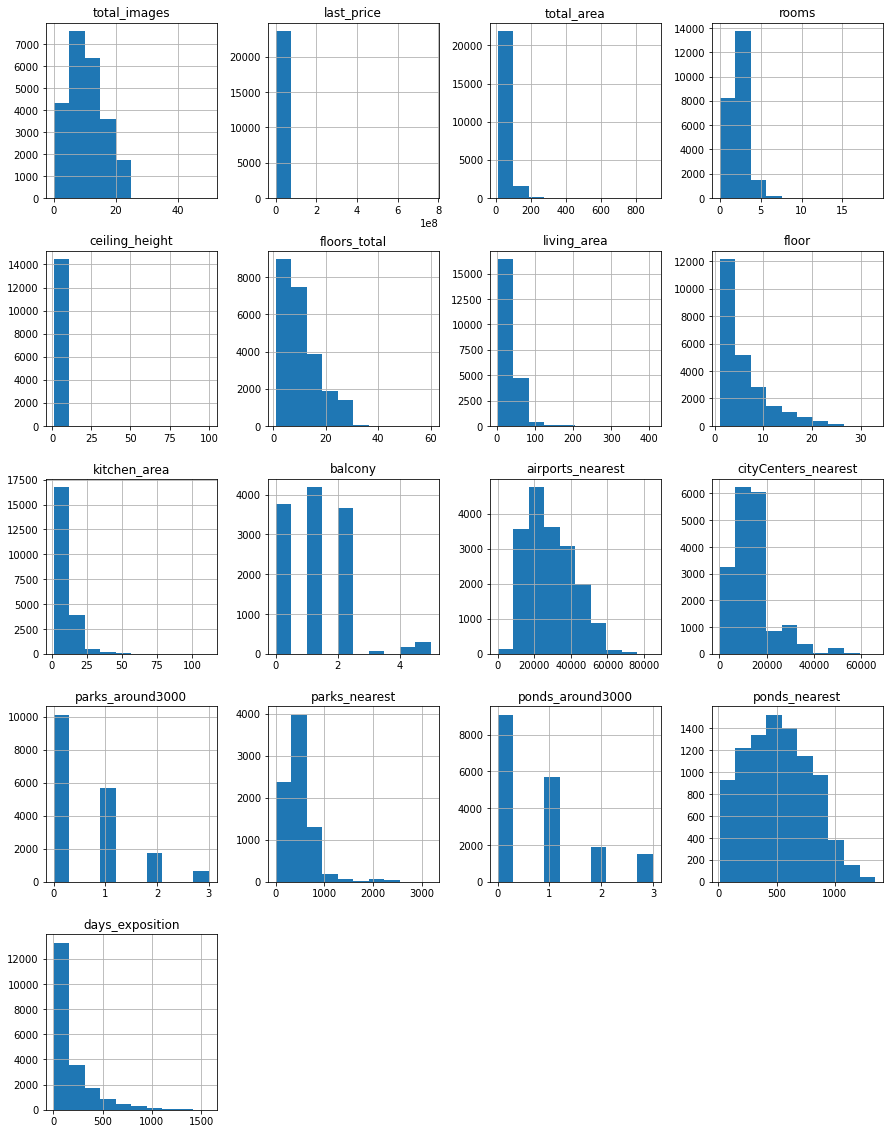

In [5]:
#построим гистограммы для всех числовых столбцов датафрейма
data.hist(figsize=(15, 20))

Вывод: 
При первичном ознакомлении с массивом данных видим, что таблица имеет размер 22 столбца х 23699 строк. Значения представлены в 4 типах данных: int64, float64, object и bool. Количество значений в столбцах различается - в данных имеются пропуски, и их относительное количество различается в зависимости от столбца.

### Предобработка данных

In [6]:
#выведем названия столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
#переименуем столбцы cityCenters_nearest, parks_around3000, ponds_around3000
data.rename(columns={'cityCenters_nearest':'city_сenters_nearest',
                  'parks_around3000':'parks_around_3000',
                  'ponds_around3000':'ponds_around_3000'},
          inplace=True)

In [8]:
#проверим на наличие дубликатов в таблице
data.duplicated().sum()

0

Дубликаты отсутствуют

In [9]:
#найдем количество пропусков по столбцам
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Методом последовательных приближений начинаем обрабатывать пропуски в данных. Сразу обращаем внимание на столбец locality_name   - название населенного пункта отсутствует всего в 49 строках из 23699. Причина, скорее всего, техническая (ошибки синхронизации, выгрузки). Так как населённый пункт важен для исследования - удалим эти строки. 

In [10]:
#удаление строк, где значения в столбце locality_name равно NaN
data = data.dropna(subset=['locality_name'])
#и убедимся, что удалились именно 49 строк
data.shape[0]

23650

Помимо наименьшего числа пропусков, обращает на себя внимание столбец is_apartment с наибольшим количеством пропусков (20924 строк из 23699). При составлении объявлений продавцы, скорее всего, не заполняют этот параметр. Проверим какое значение является наиболее частым в этом столбце, а также тип данных.     

In [11]:
data.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    2710
True       50
Name: is_apartment, dtype: int64

In [12]:
data['is_apartment'].dtype

dtype('O')

Заменим строковый тип данных для значений столбца is_apartment на bool. Заполним пропуски значением False, так как оно встречается на два порядка чаще, чем True

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool')

Еще раз проверим пропуски по столбцам

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
city_сenters_nearest     5511
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Рассмотрим столбец balcony. Почти половина строк имеет пропуск. Возможно продавцы заполнили только основные параметры в объявлении, пропустив второстепенные. Главный расчет - заинтересовать покупателя основными параметрами жилья, качественными фото. Остальное же - можно озвучить на словах или потенциальный покупатель сам посмотрит при просмотре квартиры то, что важно конкретно для него. Заменим пропуски значение 0 и проверим тип данных.        

In [15]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].dtype

dtype('float64')

Заменим вещественный тип на целочисленный

In [16]:
data['balcony'] = data['balcony'].astype(int)

In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_сenters_nearest     5511
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Рассмотрим столбец days_exposition. Пропуски в данном столбце означают что объявление актуально и не снято с публикации. На мой взгляд их лучше убрать, так как они могут исказить нашу статистику. 

In [18]:
#data = data.dropna(subset=['days_exposition'])

In [19]:
# код добавлен после ревью
data['days_exposition'] = data['days_exposition'].fillna(-1)
data['days_exposition'].isna().sum()

0

Проверим тип данных. 

In [20]:
data['days_exposition'].dtype

dtype('float64')

Заменим вещественный тип на целочисленный - нас интересует целое количество дней без дробной части.

In [21]:
data['days_exposition'] = data['days_exposition'].astype(int)

Проверим типы данных и пропуски на данном этапе обработки датасета

In [22]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_сenters_nearest     5511
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition             0
dtype: int64

Изменим тип данных столбца first_day_exposition со строкового на datetime.

In [23]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_сenters_nearest     5511
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition             0
dtype: int64

Последовательно обработаем оставшиеся столбцы.
В столбце floors_total заменим пропуски значениями из столбца floor. В данном столбце пропусков нет - 
значит этаж, где находится квартира, известен во всех объявлениях. Как минимум, столько этажей точно есть в данном доме. 

In [25]:
#data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [26]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

0

В столбце ceiling_height более 8 тысячи строк с пропущенными данными. Рассмотрим этот столбец подробнее.

In [27]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Описание столбца вызывает вопросы. Минимальный потолок не может быть 1 м, максимальный - 100 м. 
Заменим значения менее 2,5 метров на медиану. 

In [28]:
data.loc[(data['ceiling_height'] < 2.5), 'ceiling_height'] = data['ceiling_height'].median()


Примем максимальную высоту потолка 8 метров - в дорогих или нестандартных квартирах. 

In [29]:
data.query('ceiling_height > 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,-1
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,False,...,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,5.7,0,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,-1


Очевидно, потолок выше 20 метров это аномалия. Продавцы неверно заполнили данные и ошиблись в порядке (не там поставили десятичную точку). Разделим эти данные на 10. 

In [30]:
data.loc[(data['ceiling_height'] > 20), 'ceiling_height'] = data['ceiling_height']/10

Пропущенным значениям и значениям выше 8 метров присвоим медиану. Проверим остались ли пропущенные данные.

In [31]:
data.loc[(data['ceiling_height'] > 8), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

Пропуски в столбце kitchen_area заполним медианным значением в группах в зависимости от количества комнат. Проверим пропущенные данные.

In [32]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform(func='median'))
data['kitchen_area'].isna().sum()

194

Проверим сколько комнат в квартирах в которых не заполнена площадь кухни. Возможно это студии, в которых отсутствует отдельная кухня. 

In [33]:
data[data['kitchen_area'].isna()==True].groupby('rooms')['total_images'].count()

rooms
0    194
Name: total_images, dtype: int64

Количество комнат ноль - значит студия. Заменим эти пропуски на 0.

In [34]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

Пропуски в столбце living_area: проведем группировку данным по количеству комнат и определим долю жилой площади от общей площади в каждой группе.  

In [35]:
living_area_percent = (pd.DataFrame(data.groupby('rooms')['living_area'].median()
                                  /data.groupby('rooms')['total_area'].median()))
living_area_percent.columns = ['Доля жилой площади']
living_area_percent.head()

,Доля жилой площади
rooms,
0,0.690316
1,0.480874
2,0.575472
3,0.618132
4,0.640987


Объединим полученную таблицу с основной.

In [36]:
data = data.merge(living_area_percent, on='rooms', how='left')

Заполним пропуски значением общей площади умноженной на долю из новой таблицы с округлением до десятых.

In [37]:
data['living_area'] = data['living_area'].fillna(data['total_area']*data['Доля жилой площади']).round(1)

Пропуски в колонках parks_around_3000 и ponds_around_3000 заменим на 0, эти параметры второстепенны. Если это нужно заполнить самому продавцу вручную - посчитать это непросто, даже если хорошо знаешь свой район. Плюс увеличится время заполнения объявления. Сайт объявлений, если посчитает нужным, может реализовать функционал автоматического заполнения этих столбцов.
Изменим тип данных на целочисленный.

In [38]:
data[['parks_around_3000', 'ponds_around_3000']] = data[['parks_around_3000', 'ponds_around_3000']].fillna(0)
data[['parks_around_3000', 'ponds_around_3000']] = data[['parks_around_3000', 'ponds_around_3000']].astype(int)

Данные по расстоянию до водоема, парка, аэропорта, центра города оставим с пропусками. Причина аналогична: продавцу долго заполнять все второстепенные параметры, а сидеть с картой и замерять расстояние до всех этих точек будут точно не все пользователи. Проще реализовать автозаполнение (если оно целесообразно), чем добиваться ручного заполнения. Пропусков много, также в датасете много населенных пунктов, расположенных в области. Усредненные значения и медианы здесь не помогут - можем не угадать и в обьявлении появятся данные, которые не соответствуют действительности.

Перейдем к устранению оставшихся аномалий (все столбцы) в данных и неявным дубликатам (столбец с названием населенного пункта). 

Дополним датафрейм столбцом с видом населенного пункта, букву "ё" заменим на "е"

In [39]:
def type_locality(row):
    if 'Санкт-Петербург' in row:
        return 'город'
    if 'поселок' or 'посёлок' in row:
        return 'поселок'
    elif 'село' in row:
        return 'село'
    elif 'деревня' in row:
        return 'деревня'
    elif 'товарищество' in row:
        return 'товарищество'
    else:
        return 'город'
data = data.apply(lambda x: x.replace({'ё':'е'}, regex=True))    
data['type_locality'] = data['locality_name'].apply(type_locality)

Преобразуем столбец locality_name и оставим только название населенного пункта. Проверим дубликаты.

In [40]:
data = data.apply(lambda x: x.replace({'поселок при железнодорожной станции ':''}, regex=True))
data = data.apply(lambda x: x.replace({'поселок городского типа имени ':''}, regex=True))
data = data.apply(lambda x: x.replace({'поселок городского типа ':''}, regex=True))
data = data.apply(lambda x: x.replace({'городской поселок ':''}, regex=True))
data = data.apply(lambda x: x.replace({'поселок при железнодорожной станции ':''}, regex=True))
data = data.apply(lambda x: x.replace({'коттеджный поселок ':''}, regex=True))
data = data.apply(lambda x: x.replace({'поселок станции ':''}, regex=True))
data = data.apply(lambda x: x.replace({'поселок ':''}, regex=True))
data = data.apply(lambda x: x.replace({'село ':''}, regex=True))
data = data.apply(lambda x: x.replace({'деревня ':''}, regex=True))
data = data.apply(lambda x: x.replace({'садовое товарищество ':''}, regex=True))
data = data.apply(lambda x: x.replace({'садоводческое некоммерческое товарищество ':''}, regex=True))
data = data.apply(lambda x: x.replace({'садовое товарищество ':''}, regex=True))

data.duplicated().sum()

0

Проверим столбцы last_price на предмет аномальных данных.

In [41]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Вызывают вопросы минимум и максимум. Изучим эти строки.

In [42]:
data.query('last_price<13000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,Доля жилой площади,type_locality
8750,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8,0.575472,город


Здесь явно ошибка, и имелось в виду 12 млн. Квартира в новостройке площадью 109 метров столько примерно столько.

In [43]:
data.loc[7599, 'last_price'] = data.loc[7599, 'last_price']*1000

In [44]:
data.query('last_price>762000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,Доля жилой площади,type_locality
7599,15,5.350000e+09,77.0,2017-11-19,3,2.65,6.0,46.0,6,False,...,Гатчина,NaN,NaN,0,NaN,0,NaN,60,0.618132,поселок
12897,19,7.630000e+08,400.0,2017-09-30,7,2.65,10.0,250.0,10,False,...,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33,0.677570,город


Это значение похоже на правду - элитное жилье.

Вывод:

При предварительной обработке данных были внесены следующие изменения: 
- названия столбцов приведены к единому стилю
- удалены или заменены пропущенные значения в различных столбцах датасета, часть пропусков осталась неизменной (ввиду отсутствия логичной замены)
- исследованы типы данных значений столбцов, в некоторых столбцах тип данных был преобразован на более подходящий
- устранены неявные дубликаты в столбце с названием населенного пункта
- изменены редкие и выбивающиеся значения в некоторых столбцах


### Посчитайте и добавьте в таблицу новые столбцы

In [45]:
# цена за 1 квадратный метр
data['1m2_price'] = data['last_price'] / data['total_area']

In [46]:
# день недели, месяц и год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [47]:
# тип этажа квартиры
def floor_category(number):
    floor = number['floor']
    floors_total = number['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_category, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,Доля жилой площади,type_locality,1m2_price,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,-1,0.618132,город,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,81,0.480874,поселок,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2,574.0,558,0.575472,город,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,98.3,9,False,...,3,234.0,424,0.618132,город,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121,0.575472,город,100000.000000,1,6,2018,другой


In [48]:
# расстояние до центра в км
data['km_to_city_center']=data['city_сenters_nearest']/1000

В новом столбце нужно убрать пропуски, чтобы изменить тип на целочисленный. Заполним произвольным значением -1

In [49]:
data['km_to_city_center']=data['km_to_city_center'].fillna(-1)
data['km_to_city_center']=data['km_to_city_center'].astype('int')

Вывод: Столбцы добавлены.

### Проведите исследовательский анализ данных

Исследуем характеристики площади в нашем обработанном датафрейме: общей, жилой и кухонной.

In [50]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Text(0.5, 0, 'Площадь')

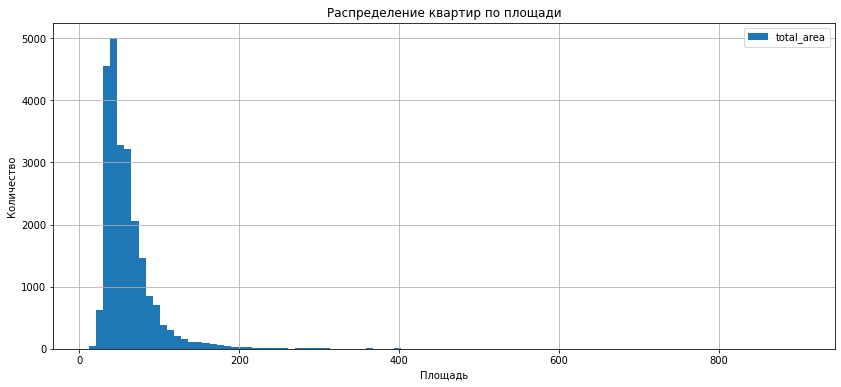

In [51]:
data['total_area'].hist(bins=100,legend=True,figsize=(14, 6))
plt.title("Распределение квартир по площади")
plt.ylabel("Количество")
plt.xlabel("Площадь")

Основная масса квартир приходится на площадь до 100 м. От 100 до 200 м² - значения имеют уже другой порядок, но различимы визуально на гистограмме. После 200 м² - практически сливаются с осью x. 
Среднее значение и медиана отличаются незначительно. В статистике представлены квартиры от 12 до 900 м². Самое большое число объявлений - квартиры площадью 40-45 м². 

In [52]:
data['living_area'].describe()

count    23565.000000
mean        34.637102
std         22.770791
min          2.000000
25%         18.700000
50%         30.000000
75%         42.300000
max        427.500000
Name: living_area, dtype: float64

Text(0.5, 0, 'Жил.площадь')

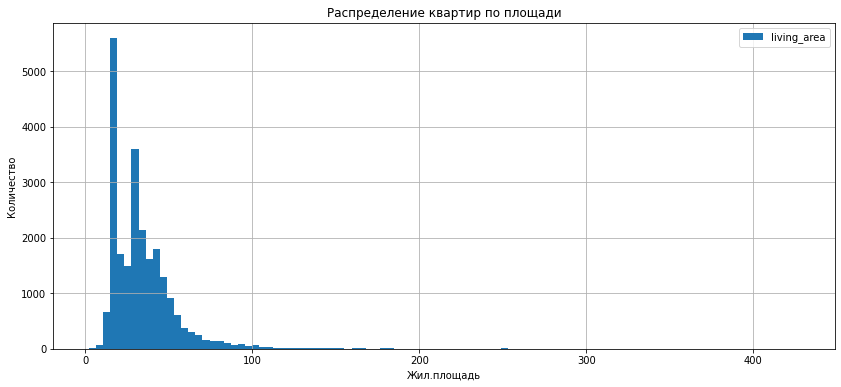

In [53]:
data['living_area'].hist(bins=100,legend=True,figsize=(14, 6))
plt.title("Распределение квартир по площади")
plt.ylabel("Количество")
plt.xlabel("Жил.площадь")

Внешне гистограммы и таблицы похожи - логично предположить взаимосвязь между общей площадью и жилой. Отличие в том, что явных экстремума два, а не один. Возможно, здесь есть искажения из-за объявлений на квартиры-студии. 

In [54]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.368305
std          5.721133
min          0.000000
25%          7.200000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

Text(0.5, 0, 'Площадь кухни')

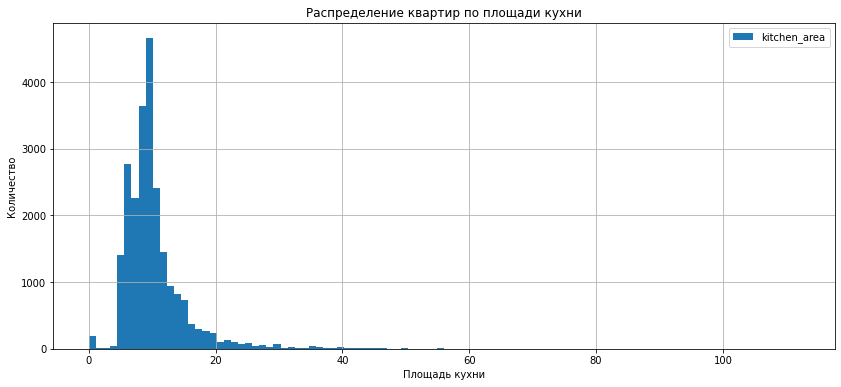

In [55]:
data['kitchen_area'].hist(bins=100,legend=True,figsize=(14, 6))
plt.title("Распределение квартир по площади кухни")
plt.ylabel("Количество")
plt.xlabel("Площадь кухни")

По данной гистограмме также есть явное сходство. Экстремумы и спад к нулевой оси с увеличением метража. Отличие есть - доля объявлений с нулевой площадью кухни (квартиры студии). 

Проанализируем столбец с ценой объекта. 

In [56]:
data['last_price'].describe()

count    2.356500e+04
mean     6.766863e+06
std      3.647876e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      5.350000e+09
Name: last_price, dtype: float64

Text(0.5, 0, 'Цена')

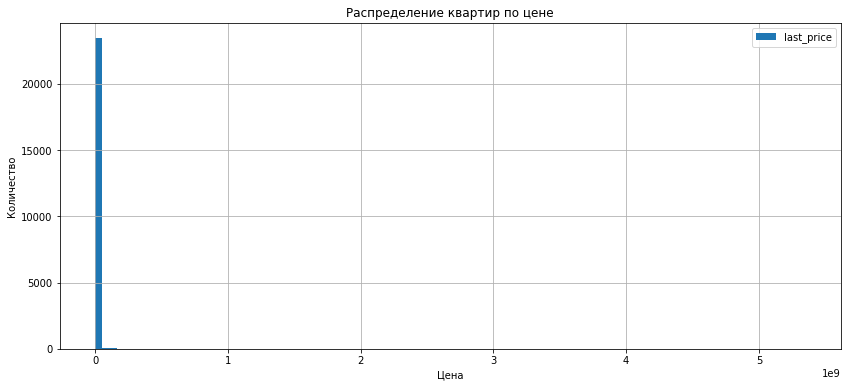

In [57]:
data['last_price'].hist(bins=100,legend=True,figsize=(14, 6))
plt.title("Распределение квартир по цене")
plt.ylabel("Количество")
plt.xlabel("Цена")

График малоинформативен из-за большого разброса цен, значения отличаются на порядки. В одном датасете присутствуют продажи как жилья для "среднего класса", так и продажи элитного жилья. 
Построим отдельную гистограмму для объявлений с ценой до 10 млн.

Text(0.5, 0, 'Цена 10 млн')

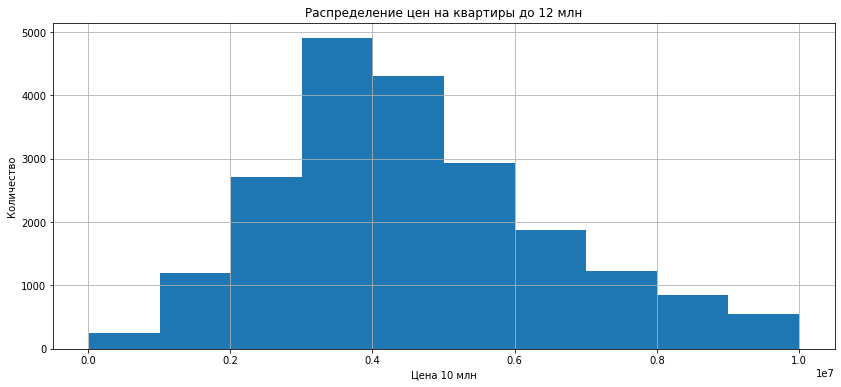

In [58]:
data.query('last_price < 10_000_000')['last_price'].hist(figsize=(14, 6))
plt.title("Распределение цен на квартиры до 12 млн")
plt.ylabel("Количество")
plt.xlabel("Цена 10 млн")

Проверим наиболее часто встречающиеся значения.

In [59]:
data['last_price'].value_counts().head(10)

4500000.0    341
3500000.0    289
4300000.0    260
4000000.0    260
4200000.0    258
3600000.0    256
3300000.0    243
3800000.0    240
3200000.0    237
3700000.0    233
Name: last_price, dtype: int64

Наиболее часто встречающиеся цены на квартиры находятся в диапазоне 3 млн 200 тыс - 4 млн 500 тыс.

Рассмотрим последний из основных параметров - число комнат в квартире. Используем диаграмму размаха.

In [60]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Комнаты')

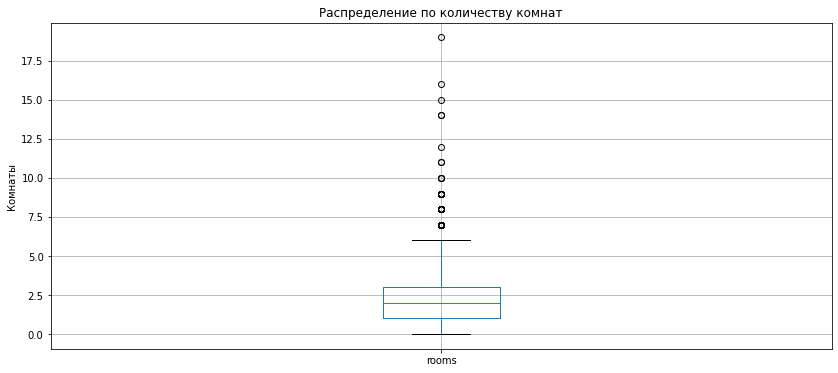

In [61]:
data.boxplot(column='rooms',figsize=(14,6))
plt.title("Распределение по количеству комнат")
plt.ylabel("Комнаты")

Гистограмма подтверждает действительность, на которую большинство обычных людей ориентируется и без аналитики. Большинство квартир - от 1 до 3 комнат. Самые популярные - однушки. От 7 комнат - выбросы, жилье доступное единичным покупателям, а не основной массе.

Последовательно разберем второстепенные параметры объявлений: высота потолков, этаж квартиры, его тип и общее количество в доме, расстояния до центра, аэропорта и парка.

Text(0, 0.5, 'Количество квартир')

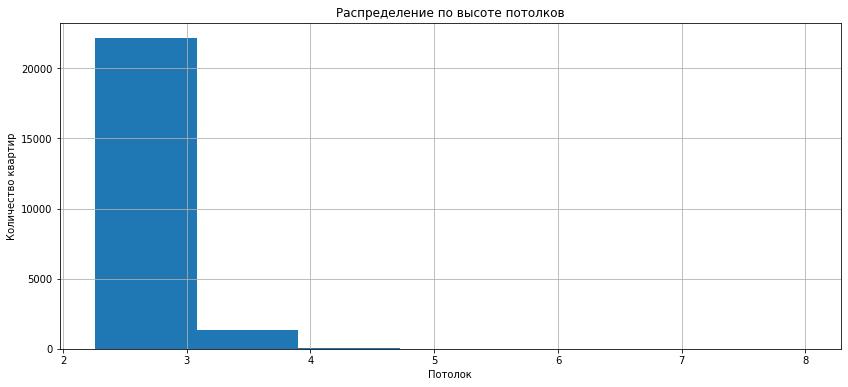

In [62]:
data['ceiling_height'].hist(bins=7,figsize=(14,6))
plt.title("Распределение по высоте потолков")
plt.xlabel("Потолок")
plt.ylabel("Количество квартир")

In [63]:
data['ceiling_height'].value_counts().head(10)

2.65    9836
2.50    3522
2.60    1646
2.70    1579
3.00    1108
2.80     988
2.55     980
2.75     907
3.20     278
3.10     203
Name: ceiling_height, dtype: int64

Text(0, 0.5, 'Количество квартир')

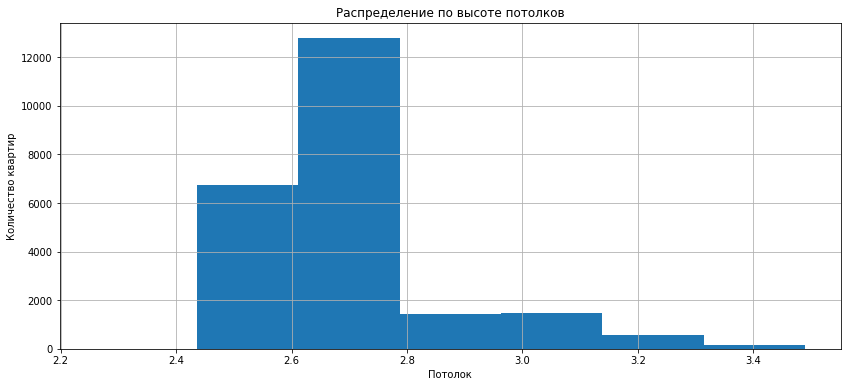

In [64]:
#отмасштабируем гистограмму
data.query('ceiling_height < 3.5')['ceiling_height'].hist(bins=7,figsize=(14,6))
plt.title("Распределение по высоте потолков")
plt.xlabel("Потолок")
plt.ylabel("Количество квартир")

Наиболее частая высота потолка - 2.65 метров. Самое большое число объявлений в диапазоне 2.5 - 2.7 м.

In [65]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [66]:
data['floor'].value_counts().head(10)

2     3351
3     3061
1     2909
4     2793
5     2612
6     1293
7     1211
8     1075
9     1045
10     684
Name: floor, dtype: int64

Text(0, 0.5, 'Этаж')

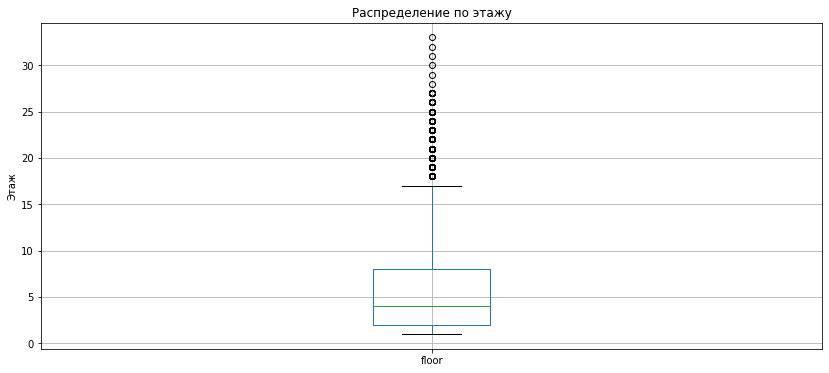

In [67]:
data.boxplot(column='floor',figsize=(14,6))
plt.title("Распределение по этажу")
plt.ylabel("Этаж")

Окружающая нас действительность подтверждается и на этой гистограмме. Квартира, расположенная выше 17 этажа - явно элитное и дорогое (редкое) жилье. Находится скорее всего в небоскребе или элитном ЖК. 
Медиана - 4, среднее - 6, большинство окружающих нас типовых домов - 5-ти или 9-этажки, метод value_counts подтверждает относительно равномерное распределение объявлений с 1 по 5 этаж.

In [68]:
data.groupby('floor_type')['last_price'].median()

floor_type
другой       4848500.0
первый       3900000.0
последний    4300000.0
Name: last_price, dtype: float64

Группировка данных показывает нам, что на первом этаже - квартиры наименьшей стоимости. На последнем этаже - дороже. На промежуточных этажах - наибольшая стоимость квартир.

Text(0.5, 0, 'Этажей в доме')

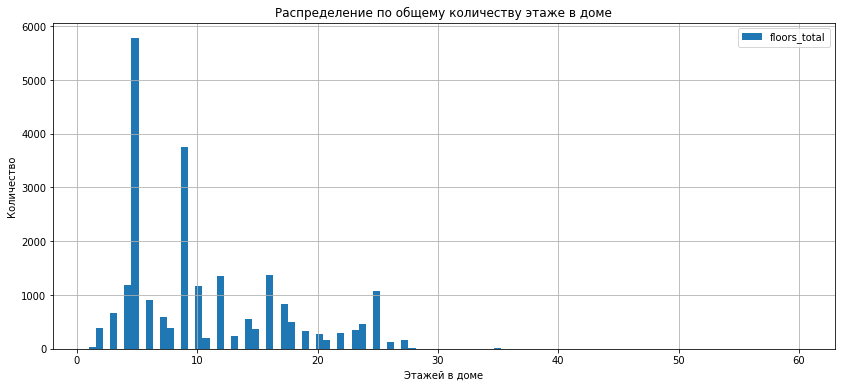

In [69]:
data['floors_total'].hist(bins=100,legend=True,figsize=(14, 6))
plt.title("Распределение по общему количеству этаже в доме")
plt.ylabel("Количество")
plt.xlabel('Этажей в доме')

И снова график подтверждает нам, что нас в основном окружают 5-ти и 9-ти этажные дома. В них - экстремумы на гистограмме. Также еще видны большие количества объявлений в 12-ти и 17-ти этажных домах, скорее всего, современные новостройки спальных районов.

<AxesSubplot:>

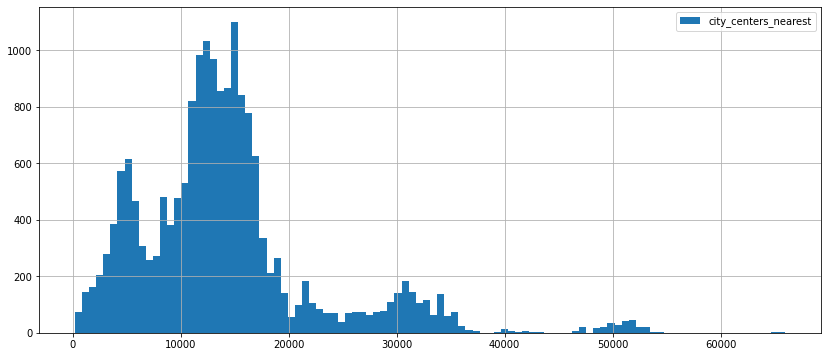

In [70]:
data['city_сenters_nearest'].hist(bins=100,legend=True,figsize=(14, 6))

<AxesSubplot:>

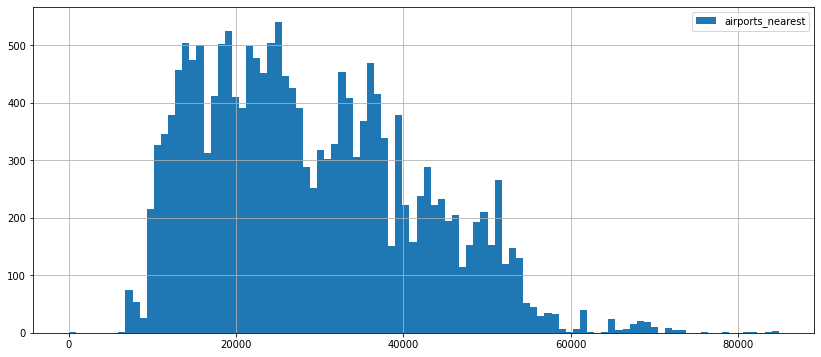

In [71]:
data['airports_nearest'].hist(bins=100,legend=True,figsize=(14, 6))

<AxesSubplot:>

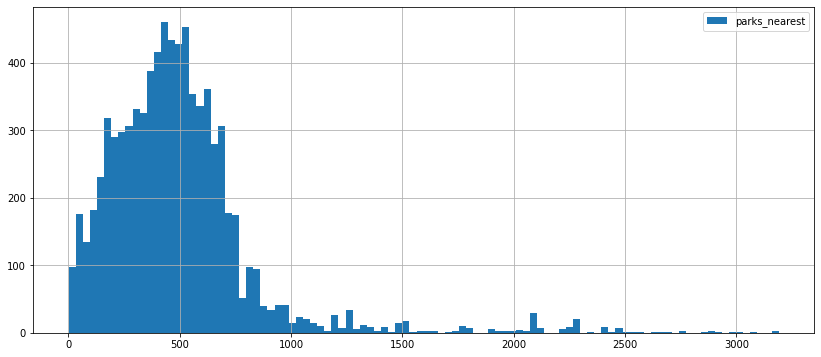

In [72]:
data['parks_nearest'].hist(bins=100,legend=True,figsize=(14, 6))


Гистограммы по столбцам удаленности от центра, аэропорта или парка не информативны, так как не все продавцы заполнили информацию.

Text(0.5, 0, 'День недели')

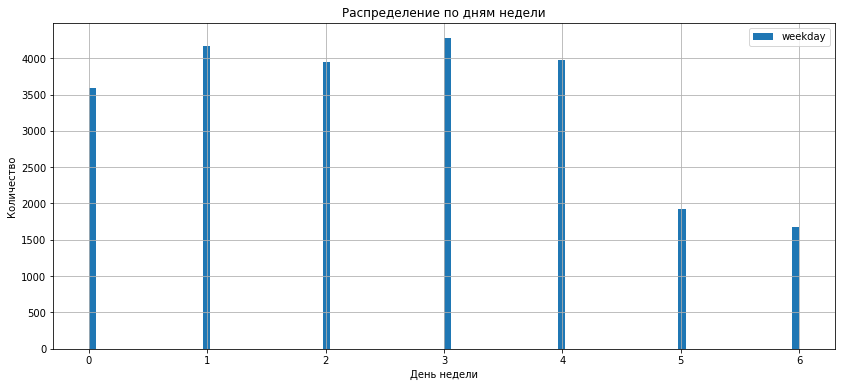

In [73]:
data['weekday'].hist(bins=100,legend=True,figsize=(14, 6))
plt.title("Распределение по дням недели")
plt.ylabel("Количество")
plt.xlabel('День недели')

По выходным объявлений размещено меньше, чем в будние дни. 

Text(0.5, 0, 'День недели')

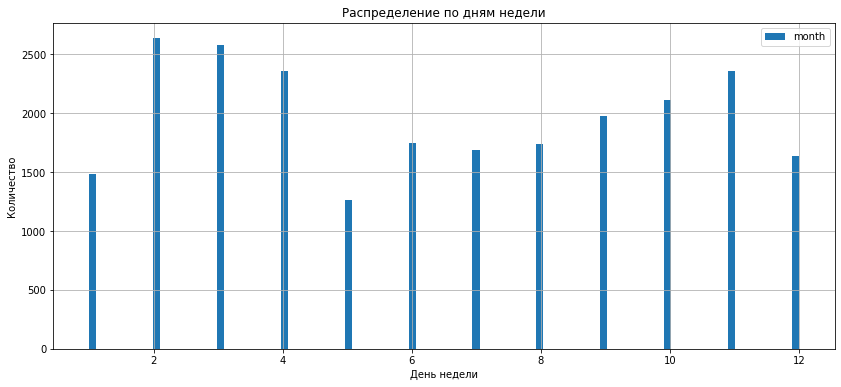

In [74]:
data['month'].hist(bins=100,legend=True,figsize=(14, 6))
plt.title("Распределение по дням недели")
plt.ylabel("Количество")
plt.xlabel('День недели')

Аутсайдеры по количеству объявлений - январь, май, декабрь. Январь и май - рекордсмены по количеству выходных, декабрь - у большинства людей подготовка к НГ. Соответственно, количество объявлений меньше.

Изучим, как быстро продавались квартиры (столбец days_exposition). 

In [75]:
data['days_exposition'].describe()

count    23565.000000
mean       156.285551
std        213.616127
min         -1.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение почти в 2 раза больше медианы, и посмотрим на выбросы. Построим "ящик с усами".

Text(0, 0.5, 'Количество дней')

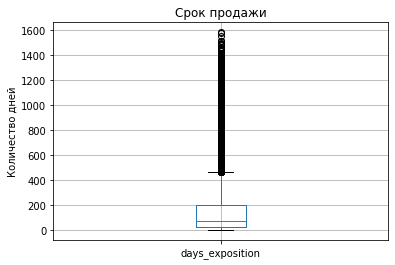

In [76]:
data.boxplot(column='days_exposition')
plt.title("Срок продажи")
plt.ylabel("Количество дней")

Text(0, 0.5, 'Количество дней')

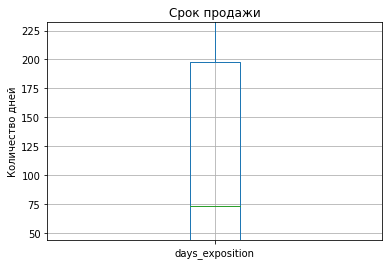

In [77]:
data.boxplot(column='days_exposition')
plt.ylim(44, 232)
plt.title("Срок продажи")
plt.ylabel("Количество дней")

По графику видно, что выше 500 дней присутствуют выбросы. Построим гистограмму с фильтром по значениям меньше 500 дней

Text(0, 0.5, 'Количество квартир')

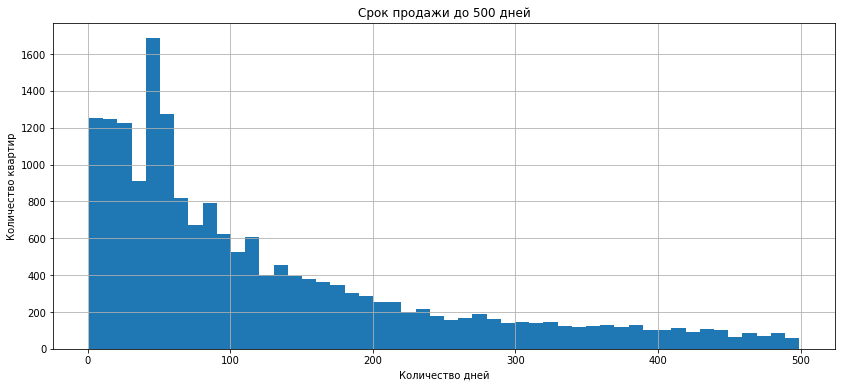

In [78]:
#отцепим от гистограммы заглушки - days_exposition=-1
data.query('0 < days_exposition < 500')['days_exposition'].hist(bins=50,figsize=(14,6))
plt.title("Срок продажи до 500 дней")
plt.xlabel("Количество дней")
plt.ylabel("Количество квартир")

In [79]:
data.query('days_exposition < 500')['days_exposition'].describe()

count    21823.000000
mean       108.321496
std        118.977160
min         -1.000000
25%         19.000000
50%         62.000000
75%        159.000000
max        499.000000
Name: days_exposition, dtype: float64

В датасете представлены квартиры c большим разбросом по сроку продажи. Минимальный срок продажи - 1 день. Максимальный - более 4 лет. Если исключить выбросы - медиана снижается на треть. На гистограмме видно, что самый распространеный срок продажи - 45 дней. Период продажи от 44 до 181 дней считается нормой. До 44 дней - очень быстрым, а более 181 дней - долгим. 

Зависимость цены от других параметров проверим с помощью тепловой карты.

Построим диаграмму рассеяния и посчитает коэффициент корреляции цены с общей площади.

In [81]:
data['last_price'].corr(data['total_area'])

0.1984087222492047

Text(0, 0.5, 'Цена 10 млн.')

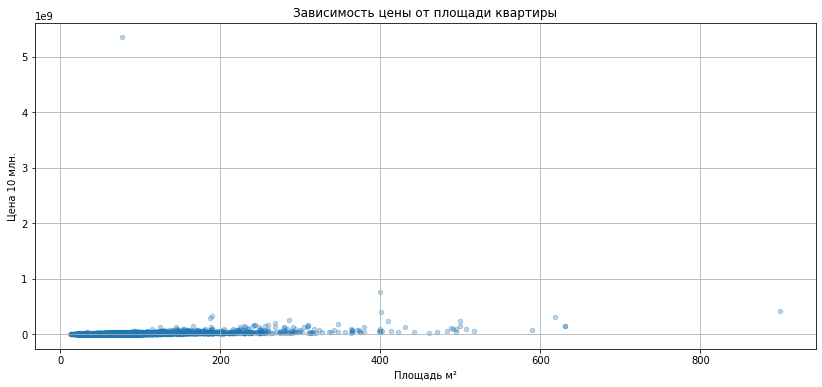

In [82]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha=0.3,figsize=(14,6))
plt.title("Зависимость цены от площади квартиры")
plt.xlabel("Площадь м²")
plt.ylabel("Цена 10 млн.")

Коэффициент Пирсона 0.65 говорит о том цена довольно сильно зависит от площади квартиры.

In [83]:
#проверим зависимость жилой и общей площади
data['total_area'].corr(data['living_area'])

0.9469688506225966

Коэффициент корреляции total_area и living_area близок к 1, что максимально логично. Соответственно, цена почти в такой же степени прямо зависит от жилой площади квартиры. 

Text(0, 0.5, 'Цена 10 млн.')

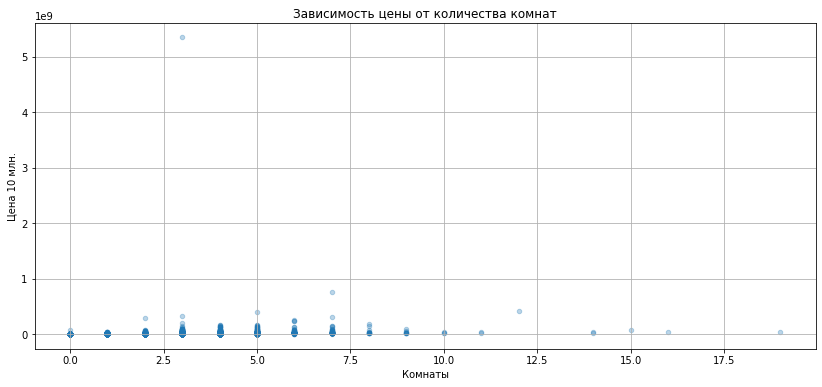

In [84]:
data.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha=0.3,figsize=(14,6))
plt.title("Зависимость цены от количества комнат")
plt.xlabel("Комнаты")
plt.ylabel("Цена 10 млн.")

In [85]:
data['last_price'].corr(data['rooms'])

0.11398902288657295

От количества комнат зависимость цены фактически отсутствует. 

In [86]:
data['last_price'].corr(data['kitchen_area'])

0.14016399302045787

Text(0, 0.5, 'Цена 10 млн.')

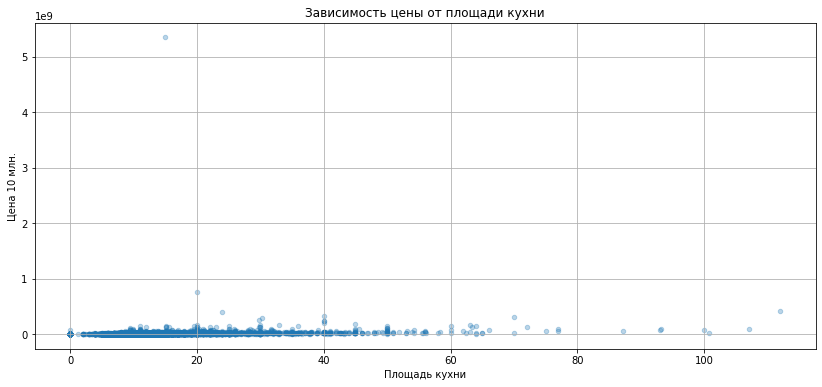

In [87]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, alpha=0.3,figsize=(14,6))
plt.title("Зависимость цены от площади кухни")
plt.xlabel("Площадь кухни")
plt.ylabel("Цена 10 млн.")

Площадь кухни на цену также практически не влияет.

In [88]:
data.groupby('floor_type')['last_price'].median()

floor_type
другой       4848500.0
первый       3900000.0
последний    4300000.0
Name: last_price, dtype: float64

Группировка данных показывает нам, что на первом этаже - квартиры наименьшей стоимости. На последнем этаже - дороже. На промежуточных этажах - наибольшая стоимость квартир. Всего три категории этажей - график не нужен.

In [89]:
data.groupby('weekday')['last_price'].median()

weekday
0    4650000.0
1    4720000.0
2    4700000.0
3    4650000.0
4    4550000.0
5    4550000.0
6    4530000.0
Name: last_price, dtype: float64

<AxesSubplot:>

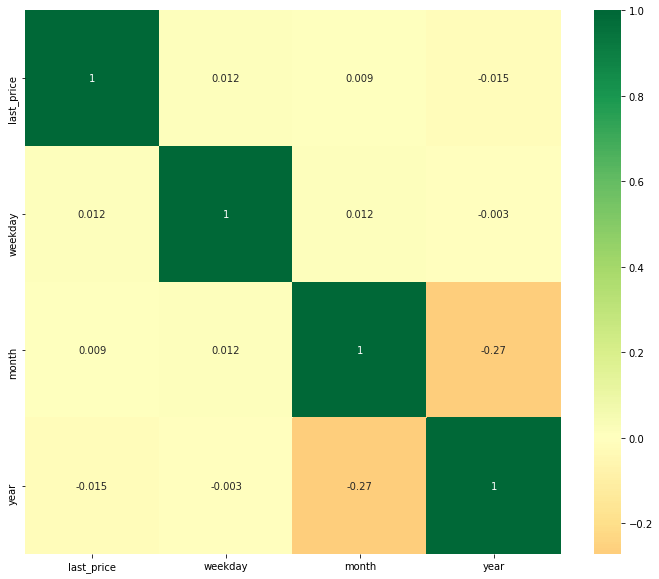

In [90]:
df_corr = (data[['last_price','weekday','month','year'
           ]])

plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns,\
            yticklabels=df_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)

Интуитивно понятно, что цена квартиры не может коррелировать с днем недели, месяцем, годом размещения объявления. Тут может влиять много внешних факторов. Упал рынок недвижимости или вырос, на это может влиять гос. политика: внутренняя и внешняя, эпидемиологическая обстановка, демография и так далее. Как показать отсутствие зависимости без тепловой карты мне пока не хватает знаний. 

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [91]:
great_locality = data.pivot_table(index = ['locality_name'], values = '1m2_price', aggfunc = ['count', 'mean'])
great_locality.columns = ['ad_count', 'meter_mean']
great_locality = great_locality.reset_index(drop=False)
great_locality['meter_mean'] = round(great_locality['meter_mean']).astype(int)
great_locality.sort_values(by='ad_count', ascending=False).head(10)

,locality_name,ad_count,meter_mean
223,Санкт-Петербург,15651,114869
146,Мурино,586,86041
105,Кудрово,470,95261
298,Шушары,439,78551
34,Всеволожск,398,68654
202,Пушкин,369,103126
88,Колпино,338,75425
170,Парголово,327,90176
42,Гатчина,307,294841
35,Выборг,237,58142


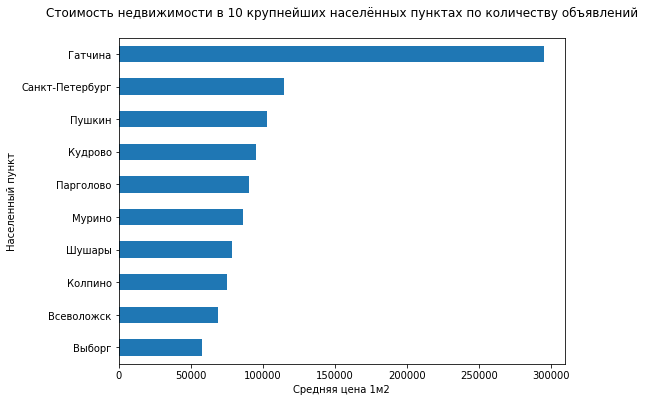

In [92]:
locality_plot = great_locality.sort_values(by='ad_count').tail(10)
locality_plot.sort_values(by='meter_mean').plot(x='locality_name', y='meter_mean', kind='barh', figsize=(8,6), legend=False)
plt.xlabel('Средняя цена 1м2')
plt.ylabel('Населенный пункт')
plt.title('Стоимость недвижимости в 10 крупнейших населённых пунктах по количеству объявлений\n')
plt.show()


Для Санкт-Петербурга рассмотрим зависимость средней цены метра в зависимости от удалённости от центра.

<AxesSubplot:xlabel='km_to_city_center'>

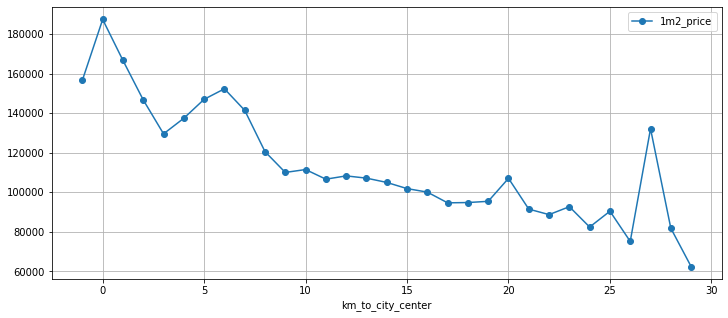

In [93]:
spb_db = data.loc[data['locality_name'] == 'Санкт-Петербург']
spb_distance = spb_db.pivot_table(index = ['km_to_city_center'], values = '1m2_price', aggfunc = 'mean')
spb_distance.sort_values(by='km_to_city_center', ascending=True).plot(grid=True, figsize=(12, 5), style='o-')

По графику видно зависимость снижения цены квадратного метра в зависимости от удалённости от центра. На графике присутствуют два пика, которые скорее всего являются выбросом.

### Общий вывод

В процессе выполнения проекта изучили данные о продаже квартир в Санкт-Петербурге и Ленинградской области.
При предварительной обработке данных в исследуемом датасете были удалены и заменены пропуски данных. Исследованы и преобразованы типы данных и неявные дубликаты.
По каждой части обработки данных представлен промежуточный вывод.